In [1]:
% matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import MiniBatchKMeans, DBSCAN
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import time
import datashader as ds
import datashader.transfer_functions as tf

In [9]:
# Directories with baseline and scaling data

project = os.path.realpath('./..')
baseline = os.path.join(project, 'baseline')
scaling = os.path.join(project, 'scalability')
images = os.path.join(project, 'images')

In [3]:
os.listdir(baseline)

['minibatch_by50_batchsize10.csv',
 'baseline.py',
 'minibatch_by50_batchsize50.csv',
 '.idea',
 'minibatch_by50_batchsize5.csv',
 'minibatch_by50_batchsize100.csv',
 'timers.py',
 'minibatch_by50_batchsize20.csv',
 'dbscan_from0.1_to2.0_by0.1.csv',
 '__init__.py',
 'timers.pyc',
 'kmeans_by5.csv']

In [4]:
os.listdir(scaling)

['sample_counters.py',
 'minibatch_scale_by500_batchsize100.csv',
 'minibatch_scale_by500_batchsize5.csv',
 'minibatch_scale_by500_batchsize50.csv',
 'kmeans_scale_by500.csv',
 'dbscan_scale_by500.csv',
 'kmeans_scale_by100.csv',
 'sample_counters.pyc',
 'scalability.py',
 'minibatch_scale_by500_batchsize20.csv',
 'minibatch_scale_by500_batchsize10.csv',
 '__init__.py']

In [5]:
kmeans = pd.read_csv(os.path.join(baseline, 'kmeans_by5.csv'))
kmeans_scaling = pd.read_csv(os.path.join(scaling, 'kmeans_scale_by500.csv'))

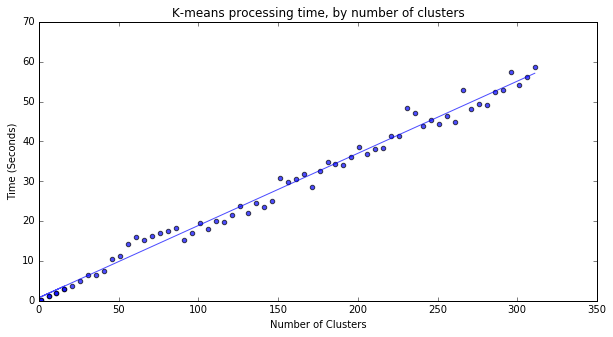

In [12]:
plt.figure(figsize=[10,5])

# Plot scatter points
plt.scatter(x=kmeans.clusters, y=kmeans.seconds, alpha=0.7)

# Add line of best fit
bestfit = np.poly1d(np.polyfit(kmeans.clusters, kmeans.seconds, 1))(kmeans.clusters)
plt.plot(kmeans.clusters, bestfit, color='blue', alpha=0.7)

# Labels and other parameters
plt.axis(xmin=0, ymin=0)
plt.xlabel('Number of Clusters')
plt.ylabel('Time (Seconds)')
plt.title('K-means processing time, by number of clusters')
plt.savefig(os.path.join(images, 'kmeans_scaling_by_clusters.png'))
plt.show()


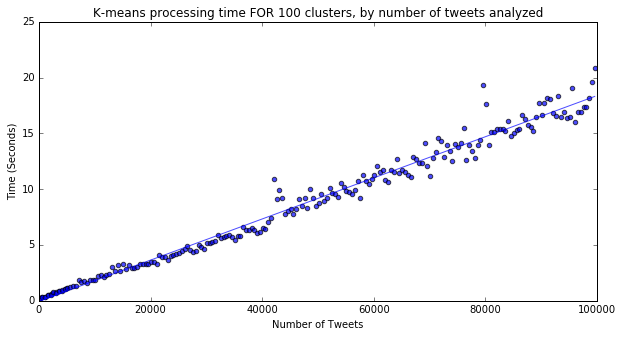

In [13]:
plt.figure(figsize=[10,5])

# Plot scatter points
plt.scatter(x=kmeans_scaling.samples, y=kmeans_scaling.seconds, alpha=0.7)

# # Add line of best fit
bestfit = np.poly1d(np.polyfit(kmeans_scaling.samples, kmeans_scaling.seconds, 1))(kmeans_scaling.samples)
plt.plot(kmeans_scaling.samples, bestfit, color='blue', alpha=0.7)

# Labels and other parameters
plt.axis(xmin=0, ymin=0, xmax=100000)
plt.xlabel('Number of Tweets')
plt.ylabel('Time (Seconds)')
plt.title('K-means processing time FOR 100 clusters, by number of tweets analyzed')
plt.savefig(os.path.join(images, 'kmeans_scaling_by_size.png'))
plt.show()

In [8]:
slope = np.polyfit(kmeans.clusters, kmeans.seconds, 1)[0]
print slope

0.18102372771


In [9]:
minibatch_files = ['minibatch_by50_batchsize5.csv', 
                   'minibatch_by50_batchsize10.csv', 
                   'minibatch_by50_batchsize20.csv',
                   'minibatch_by50_batchsize50.csv', 
                   'minibatch_by50_batchsize100.csv']
colors = ['#f6eff7', '#bdc9e1', '#67a9cf', '#1c9099', '#016c59']

mb_colors = dict(zip(minibatch_files, colors))
print mb_colors

{'minibatch_by50_batchsize100.csv': '#016c59', 'minibatch_by50_batchsize50.csv': '#1c9099', 'minibatch_by50_batchsize20.csv': '#67a9cf', 'minibatch_by50_batchsize5.csv': '#f6eff7', 'minibatch_by50_batchsize10.csv': '#bdc9e1'}


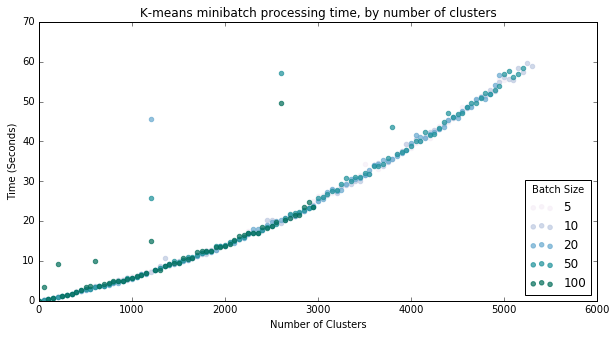

In [10]:
plt.figure(figsize=[10,5])

for data in minibatch_files:
    minibatch = pd.read_csv(os.path.join(baseline, data))
    label = data.replace('minibatch_by50_batchsize', '').replace('.csv','')
    plt.scatter(x=minibatch.clusters, y=minibatch.seconds, alpha=0.7, 
                color=mb_colors[data], label=label)

# Labels and other parameters
plt.axis(xmin=0, ymin=0)
plt.xlabel('Number of Clusters')
plt.ylabel('Time (Seconds)')
plt.title('K-means minibatch processing time, by number of clusters')
plt.legend(loc=4, title='Batch Size')
plt.show()

In [11]:
minibatch_files = ['minibatch_scale_by500_batchsize5.csv',
                   'minibatch_scale_by500_batchsize10.csv',
                   'minibatch_scale_by500_batchsize20.csv',
                   'minibatch_scale_by500_batchsize50.csv',
                   'minibatch_scale_by500_batchsize100.csv']
colors = ['#f6eff7', '#bdc9e1', '#67a9cf', '#1c9099', '#016c59']

mb_colors = dict(zip(minibatch_files, colors))
print mb_colors

{'minibatch_scale_by500_batchsize5.csv': '#f6eff7', 'minibatch_scale_by500_batchsize50.csv': '#1c9099', 'minibatch_scale_by500_batchsize100.csv': '#016c59', 'minibatch_scale_by500_batchsize20.csv': '#67a9cf', 'minibatch_scale_by500_batchsize10.csv': '#bdc9e1'}


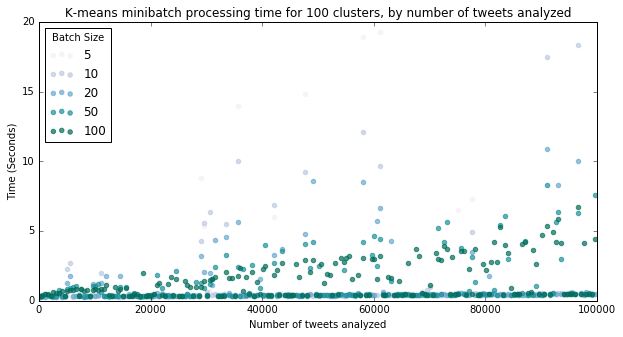

In [12]:
plt.figure(figsize=[10,5])

for data in minibatch_files:
    minibatch = pd.read_csv(os.path.join(scaling, data))
    label = data.replace('minibatch_scale_by500_batchsize', '').replace('.csv','')
    plt.scatter(x=minibatch.samples, y=minibatch.seconds, alpha=0.7, 
                color=mb_colors[data], label=label)

# Labels and other parameters
plt.axis(xmin=0, ymin=0, xmax=100000, ymax =20)
plt.xlabel('Number of tweets analyzed')
plt.ylabel('Time (Seconds)')
plt.title('K-means minibatch processing time for 100 clusters, by number of tweets analyzed')
plt.legend(loc=2, title='Batch Size')
plt.show()

In [13]:
dbscan = pd.read_csv(os.path.join(baseline, 'dbscan_from0.1_to2.0_by0.1.csv'))

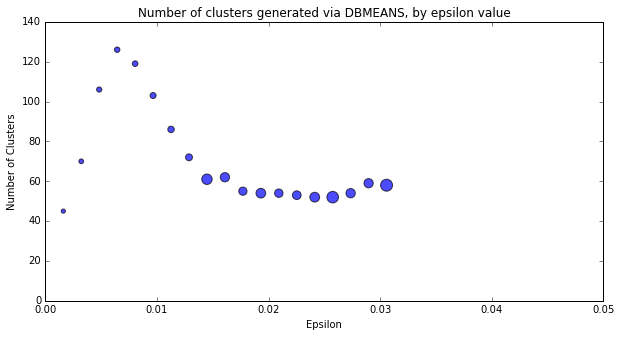

In [14]:
plt.figure(figsize=[10,5])

# Plot scatter points
plt.scatter(x=dbscan.espilon, y=dbscan.clusters, alpha=0.7, s=dbscan.seconds * 20)

# # Add line of best fit
# bestfit = np.poly1d(np.polyfit(kmeans.clusters, kmeans.seconds, 1))(kmeans.clusters)
# plt.plot(kmeans.clusters, bestfit, color='blue', alpha=0.7)

# Labels and other parameters
plt.axis(xmin=0, ymin=0)
plt.xlabel('Epsilon')
plt.ylabel('Number of Clusters')
plt.title('Number of clusters generated via DBMEANS, by epsilon value')
plt.show()

In [15]:
dbscan_scale = pd.read_csv(os.path.join(scaling, 'dbscan_scale_by500.csv'))

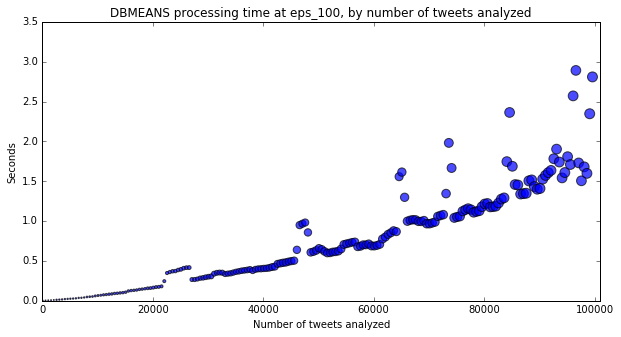

In [16]:
plt.figure(figsize=[10,5])

# Plot scatter points
plt.scatter(x=dbscan_scale.n, y=dbscan_scale.seconds, alpha=0.7, 
            s=dbscan_scale.clusters, label=dbscan_scale.clusters)

# # Add line of best fit
# bestfit = np.poly1d(np.polyfit(kmeans.clusters, kmeans.seconds, 1))(kmeans.clusters)
# plt.plot(kmeans.clusters, bestfit, color='blue', alpha=0.7)

# Labels and other parameters
plt.axis(xmin=0, ymin=0, xmax=101000)
plt.xlabel('Number of tweets analyzed')
plt.ylabel('Seconds')
plt.title('DBMEANS processing time at eps_100, by number of tweets analyzed')
plt.show()

# Clustering 1 million samples (actually more like 800,000)

In [61]:
# Load from HDF5 file

project = os.path.realpath('./..')
datadir = os.path.join(project, 'data')

with pd.HDFStore(os.path.join(datadir, 'tweets_1M.h5')) as store:
    tweets = store.tweets

In [62]:
# Constrain to Bay Area

tweets = tweets.loc[
    (tweets.lat > 36.903929764) &
    (tweets.lat < 38.853939589) &
    (tweets.lng > -123.528897483) &
    (tweets.lng < -121.213352822)
]

print len(tweets)

808061


In [63]:
tweets.head()

,id,lat,lng,text,timeStamp,user_id
0,377652254096228352,37.446100,-121.883557,@Tanner_Cortez hey checkout the website: http:...,2013-09-11 04:38:08,224874450
2,377652262325456897,37.356131,-121.842867,i laugh a lot with that line,2013-09-11 04:38:10,54351774
3,377652264682655744,37.364664,-122.009629,sons of anarchy is back on woop woop,2013-09-11 04:38:11,343219606
4,377652271116722176,37.382600,-121.995000,Drinking a Fresh Squeezed IPA by @deschutesbee...,2013-09-11 04:38:12,1569395935
5,377652275147444224,37.756149,-122.152813,I have 8 am classes this quarter ... I need to...,2013-09-11 04:38:13,399164195


In [64]:
tweets.set_index('id', inplace=True)

In [65]:
t0 = time.time()

mb = MiniBatchKMeans(n_clusters=100, init='k-means++', n_init=10, batch_size=1000)
data = tweets.as_matrix(columns=['lat', 'lng'])
mb.fit(data)
# Add fitted label back into DataFrame
tweets['mb_cluster'] = mb.labels_

meters = 100
eps = meters / 100000

for i in tweets.mb_cluster.unique():
    subset = tweets.loc[tweets.mb_cluster == i]
    db = DBSCAN(eps=eps, min_samples=100)
    data = subset.as_matrix(columns=['lat', 'lng'])
    db.fit(data)
    subset['db_cluster'] = db.labels_
    tweets.loc[tweets.mb_cluster == i, 'db_cluster'] = subset['db_cluster']

t1 = time.time() - t0
print t1

/home/paul/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


20.2596309185


In [66]:
tweets

,lat,lng,text,timeStamp,user_id,mb_cluster,db_cluster
id,,,,,,,
377652254096228352,37.446100,-121.883557,@Tanner_Cortez hey checkout the website: http:...,2013-09-11 04:38:08,224874450,68,-1.0
377652262325456897,37.356131,-121.842867,i laugh a lot with that line,2013-09-11 04:38:10,54351774,24,-1.0
377652264682655744,37.364664,-122.009629,sons of anarchy is back on woop woop,2013-09-11 04:38:11,343219606,91,-1.0
377652271116722176,37.382600,-121.995000,Drinking a Fresh Squeezed IPA by @deschutesbee...,2013-09-11 04:38:12,1569395935,57,-1.0
377652275147444224,37.756149,-122.152813,I have 8 am classes this quarter ... I need to...,2013-09-11 04:38:13,399164195,30,0.0
377652275885654016,38.402054,-121.476074,Why is Milgrim's eyes always red af..?,2013-09-11 04:38:13,170950783,46,-1.0
377652282021933056,37.477945,-122.227526,Asked him what he did today and got a response...,2013-09-11 04:38:15,330249663,22,-1.0
377652282844012544,37.274621,-121.742097,@Dlop24 my moms just nosey lol,2013-09-11 04:38:15,46575217,58,-1.0
377652284446212096,37.267046,-121.863889,“@400meterboy: Miley should have fix that tan ...,2013-09-11 04:38:15,1206558716,62,-1.0


In [71]:
tweets['cluster'] = tweets.mb_cluster + (tweets.db_cluster.replace(-1.0, np.nan) / 100)

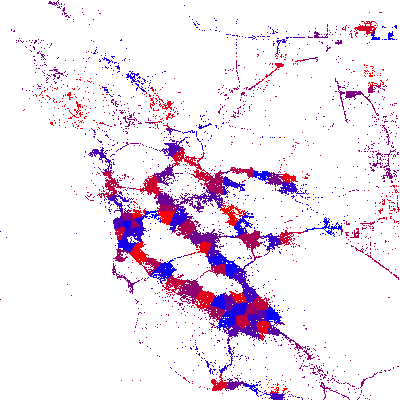

In [73]:
# Visualize points with datashader
cvs = ds.Canvas(plot_width=400, plot_height=400)
agg = cvs.points(tweets, 'lng', 'lat', ds.mean('mb_cluster'))
tf.interpolate(agg, cmap=['red', 'blue'])

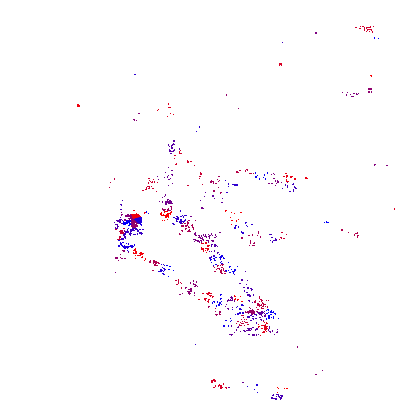

In [74]:
# Visualize points with datashader
cvs = ds.Canvas(plot_width=400, plot_height=400)
agg = cvs.points(tweets, 'lng', 'lat', ds.mean('cluster'))
tf.interpolate(agg, cmap=['red', 'blue'])

In [76]:
tweets.cluster.value_counts(sort=True).head()

86.00    47320
36.00    16745
35.02    12328
5.03      7731
21.00     7128
Name: cluster, dtype: int64

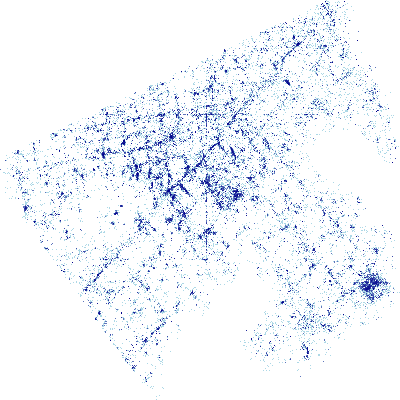

In [85]:
# Visualize points with datashader
cvs = ds.Canvas(plot_width=400, plot_height=400)
agg = cvs.points(tweets.loc[tweets.cluster == 86.00], 'lng', 'lat')
tf.interpolate(agg)